In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('Wholesale customers data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


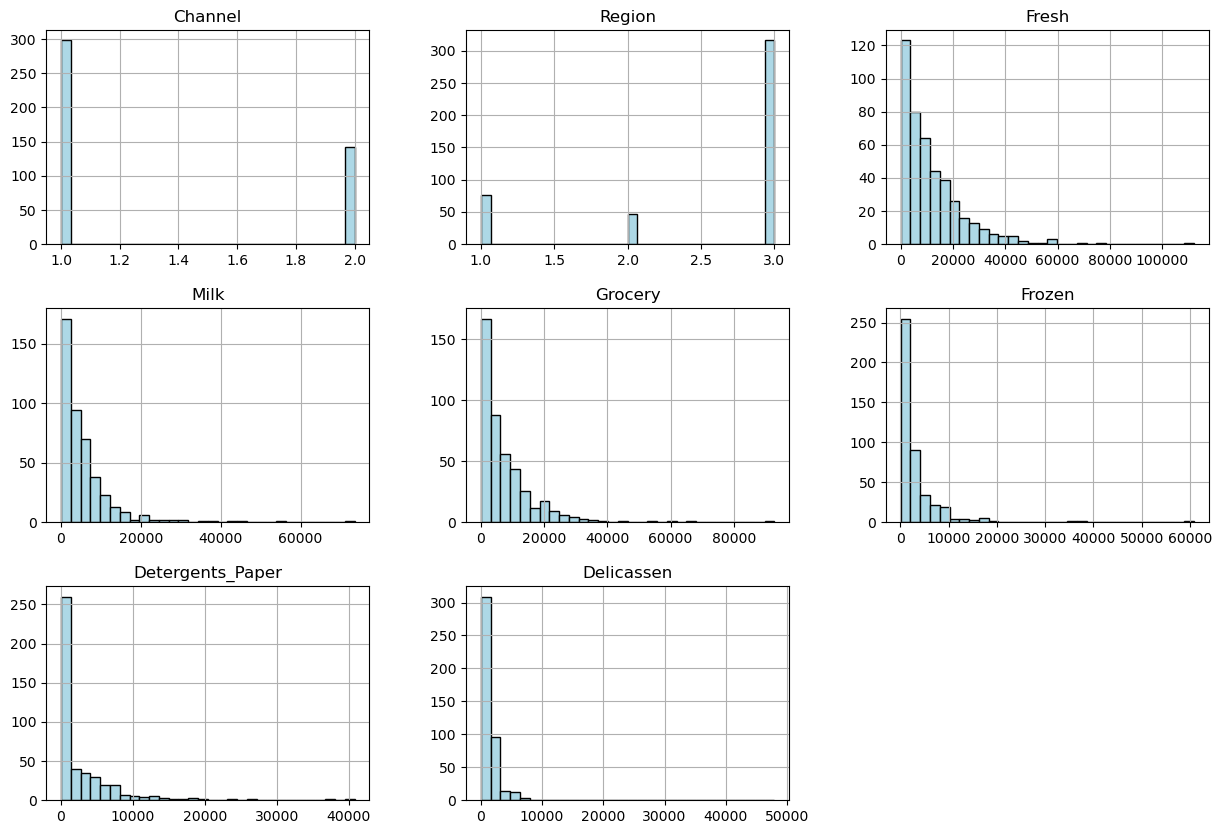

In [6]:
df.hist(figsize=(15,10),bins=30, color='lightblue', edgecolor='black')
plt.show()

Distributions are highly skewed so we apply Logarithmic transformation

In [7]:
df = np.log(df)

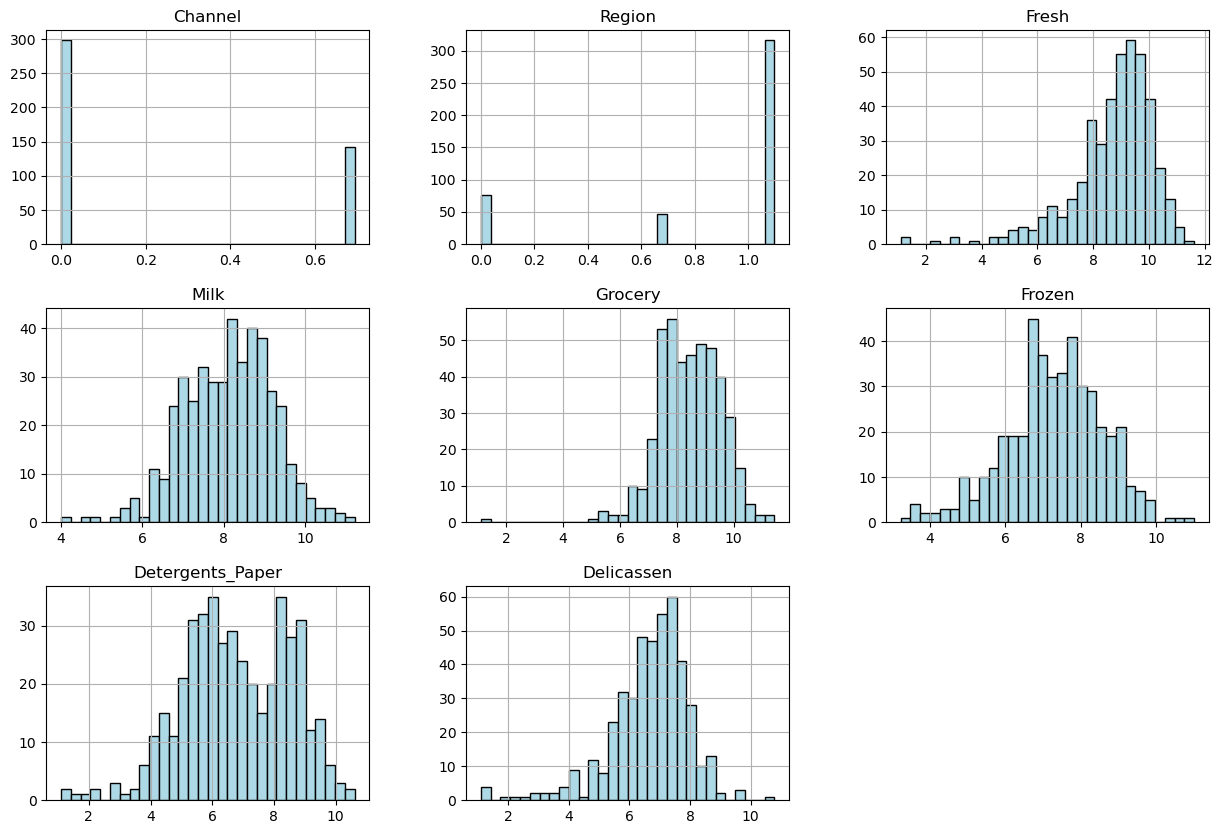

In [8]:
df.hist(figsize=(15,10),bins=30, color='lightblue', edgecolor='black')
plt.show()

Correlation Matrix

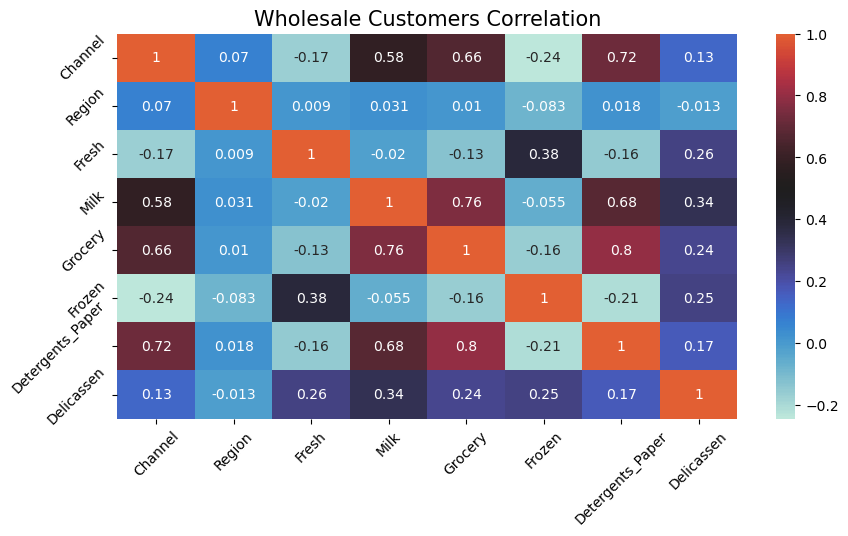

In [9]:
corr = df.corr()
plt.figure(figsize=(10,5))
plt.title('Wholesale Customers Correlation', fontsize=15)
sns.heatmap(corr, center=0.5, annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

OutlierHandling

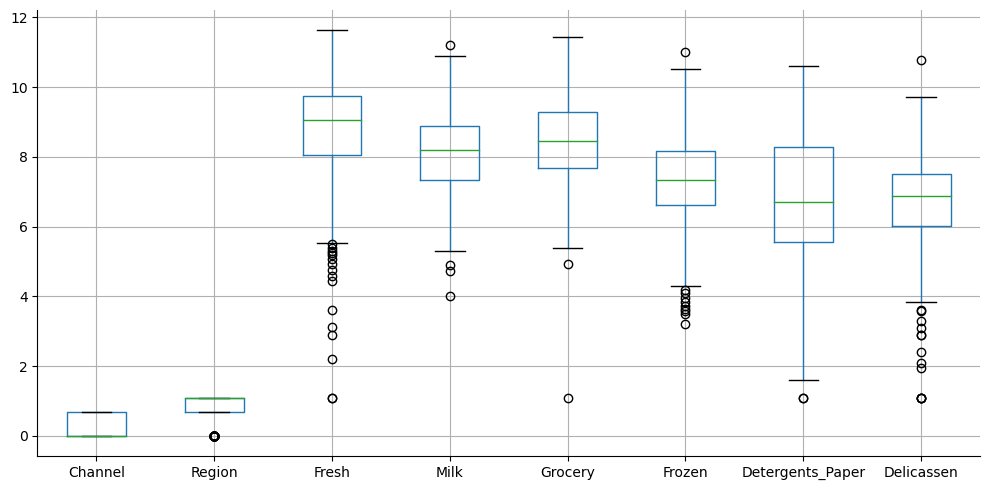

In [10]:
plt.figure(figsize=(10, 5))
df.boxplot()
sns.despine()
plt.tight_layout()
plt.show()

In [11]:
for i in df.keys():
    q25, q75 = np.percentile(df[i], [25, 75])
    iqr = q75 - q25

    lower_bound = q25 - iqr*1.5
    upper_bound = q75 + iqr*1.5

    df.loc[df[i] < lower_bound, i] = lower_bound
    df.loc[df[i] > upper_bound, i] = upper_bound

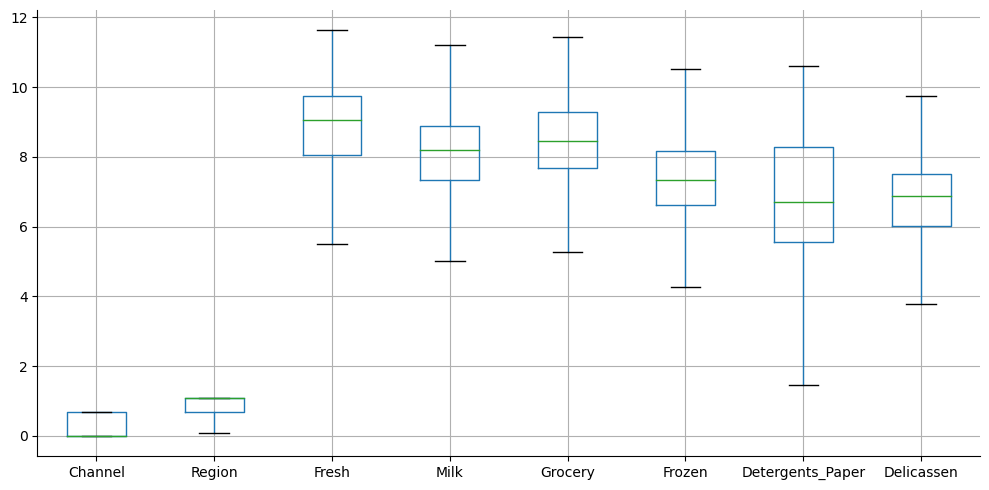

In [12]:
plt.figure(figsize=(10, 5))
df.boxplot()
sns.despine()
plt.tight_layout()
plt.show()

Standardization

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [14]:
scaled_data.shape

(440, 8)

In [15]:
x = pd.DataFrame(scaled_data, index=df.index, columns=df.columns)

In [16]:
x.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.5724,0.511439,0.982721,0.449340,-1.552986,0.644016,0.423084
1,1.448652,0.5724,0.059604,0.997515,0.670051,0.130574,0.765514,0.665937
2,1.448652,0.5724,-0.021547,0.896779,0.464469,0.379009,0.803747,1.939758
3,-0.690297,0.5724,0.546937,-0.970078,-0.097168,1.161103,-0.326231,0.671712
4,1.448652,0.5724,0.958885,0.441058,0.403214,0.768122,0.405572,1.584742


K Means Clustering

In [17]:
from sklearn.cluster import KMeans

In [18]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, n_init=10, init='k-means++')
    km.fit(x)
    css = km.inertia_ #WCSS Score
    wcss.append(css)

In [19]:
wcss

[3520.000000000001,
 2408.47579629129,
 2099.9852919410177,
 1861.4673423021623,
 1680.6522665683865,
 1563.9442337934834,
 1460.5591320296805,
 1377.2985830301911,
 1324.7986669187815,
 1255.3581631821173]

In [20]:
print(3520 - 2408,
2408 - 2099,
2099 - 1861,
1861 - 1680,
1680 - 1563,
1563 - 1471,
1471 - 1372,
1372 - 1314,
1314 - 1264)

1112 309 238 181 117 92 99 58 50


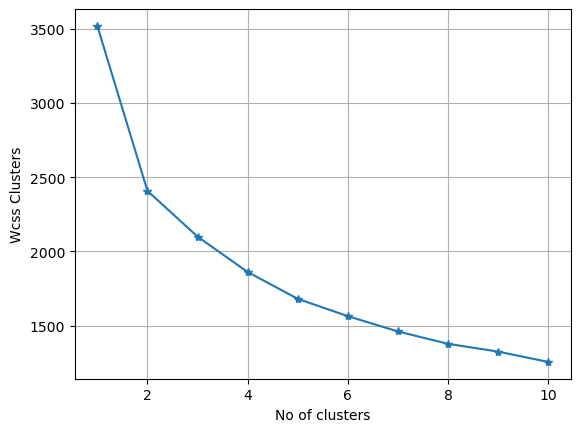

In [21]:
plt.plot(range(1,11), wcss, marker="*")
plt.xlabel('No of clusters')
plt.ylabel('Wcss Clusters')
plt.grid()
plt.show()

5 is the optimum cluster

In [22]:
km = KMeans(n_clusters=5, n_init=10, init='k-means++')

In [23]:
km.fit(x)

KMeans(n_clusters=5, n_init=10)

In [24]:
cluster_labels = km.predict(x)

In [25]:
cluster_labels

array([2, 2, 2, 3, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 1, 3, 2, 0, 2, 0,
       3, 2, 2, 1, 0, 0, 2, 3, 3, 3, 0, 3, 0, 1, 3, 2, 1, 3, 3, 3, 1, 1,
       1, 2, 2, 2, 2, 2, 3, 1, 2, 1, 3, 3, 2, 1, 0, 1, 1, 2, 2, 2, 3, 1,
       1, 2, 3, 0, 3, 3, 0, 2, 2, 0, 3, 2, 0, 0, 0, 1, 2, 0, 1, 2, 2, 3,
       0, 3, 0, 3, 2, 3, 1, 1, 1, 0, 0, 0, 2, 2, 2, 3, 0, 0, 1, 2, 1, 1,
       0, 2, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 2, 3, 3, 3, 2, 1, 3, 0, 0,
       0, 0, 0, 0, 3, 1, 3, 0, 3, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 2, 2, 0, 2, 1, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 1, 2, 1, 1, 0, 1,
       3, 3, 0, 3, 3, 3, 1, 3, 1, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 3, 4, 2,
       4, 4, 2, 2, 4, 4, 4, 2, 4, 1, 4, 2, 4, 2, 4, 4, 2, 4, 1, 4, 2, 4,
       4, 1, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       1, 4, 2, 4, 2, 4, 4, 4, 4, 3, 0, 0, 3, 0, 3, 2, 0, 2, 3, 3, 3, 0,
       0, 3, 0, 0, 0, 0, 3, 2, 3, 1, 3, 2, 2, 0, 2,

In [26]:
pd.Series(cluster_labels).value_counts()

0    133
2     99
3     93
4     60
1     55
Name: count, dtype: int64

In [27]:
df['cluster_labels'] = cluster_labels

In [28]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_labels
0,0.693147,1.098612,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931,2
1,0.693147,1.098612,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119,2
2,0.693147,1.098612,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504,2
3,0.000000,1.098612,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853,3
4,0.693147,1.098612,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525,2


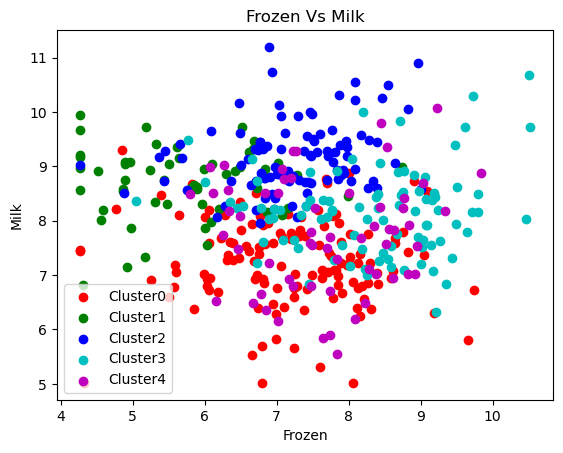

In [29]:
colors = ['r', 'g', 'b', 'c', 'm']

for i in range(max(cluster_labels)+1):
    cluster_data = df[cluster_labels==i]
    plt.scatter(cluster_data['Frozen'],
                cluster_data['Milk'],
                c=colors[i],
                label=f'Cluster{i}')
plt.xlabel('Frozen')
plt.ylabel('Milk')
plt.title('Frozen Vs Milk')
plt.legend()

Hierarchical Clustering

In [30]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [31]:
mergings = linkage(x, method='ward')

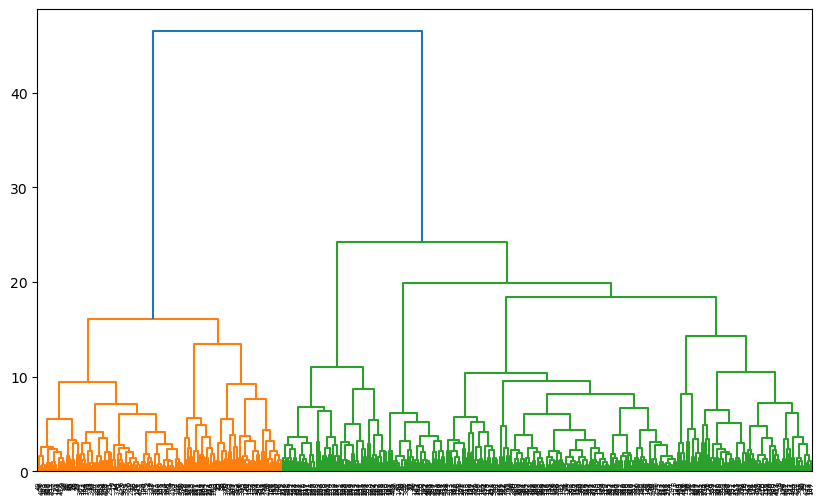

In [32]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.show()

In [33]:
cluster_labels_hc = fcluster(mergings, 22, criterion='distance')
cluster_labels_hc

array([1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3,
       3, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1,
       3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 1, 1, 1, 3,
       3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 3, 1, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 2, 1,
       2, 2, 1, 1, 2, 2, 3, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 1, 3, 1,

In [34]:
from sklearn.metrics import silhouette_score

Silhouette score HC

In [35]:
sil_score = silhouette_score(x, cluster_labels_hc)
sil_score

0.262806275193582

Silhouette score KMeans

In [36]:
sil_score = silhouette_score(x, cluster_labels)
sil_score

0.2044666791655284

DBSCAN

In [37]:
from sklearn.cluster import DBSCAN

In [38]:
dbscan = DBSCAN(eps=1)
dbscan.fit(x)

DBSCAN(eps=1)

In [39]:
cluster_labels_dbscan = dbscan.labels_

In [40]:
cluster_labels_dbscan

array([-1,  0,  0,  1,  0,  0, -1,  0,  1,  0,  0, -1, -1,  0,  0,  1,  2,
       -1,  0,  1,  0,  1, -1, -1,  0, -1,  1,  1, -1,  1,  1,  1,  1,  1,
       -1,  3,  1,  0, -1, -1, -1,  1, -1, -1, -1, -1,  0, -1,  0,  0, -1,
       -1,  0,  3,  1,  1,  0, -1,  1, -1, -1, -1,  0,  0, -1, -1, -1,  0,
       -1, -1,  1, -1, -1, -1,  0, -1, -1,  0,  1,  1,  1, -1,  0,  1, -1,
       -1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  0,  0,
        0, -1,  1,  1,  2,  0,  2, -1,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1, -1,  1, -1,  1,  0, -1,  1, -1, -1,  1,  1,  1,  1,
       -1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1,
        1, -1,  2,  0,  1,  0,  3,  0, -1,  1,  0,  0,  0,  0,  1,  1,  1,
        3, -1, -1,  3, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0,  2, -1, -1,  1, -1,  1,  1, -1, -1, -1,  4, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  4

In [41]:
sil_score = silhouette_score(x, cluster_labels_dbscan)
sil_score

-0.04133644633386365

In [42]:
from sklearn.metrics import davies_bouldin_score

score = davies_bouldin_score(x, cluster_labels_dbscan)
score

1.8812706071883722

PCA

In [43]:
from sklearn.decomposition import PCA

In [44]:
pc = PCA()
pc_array = pc.fit_transform(x)

In [45]:
pc_array.shape

(440, 8)

In [46]:
pc_array = pd.DataFrame(pc_array, columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8'])

In [47]:
pc_array.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
0,-1.929953,0.350728,-0.756790,0.114237,-1.372157,0.345542,-0.579443,-0.299159
1,-1.960488,-0.510034,-0.568184,0.013459,0.142916,0.520889,-0.425170,-0.145413
2,-2.016782,-1.269431,-0.584758,-0.932279,0.069867,0.978484,-0.243584,-0.295575
3,1.085269,-1.200770,-0.588357,-0.183414,0.435348,0.305065,0.702533,0.428905
4,-1.343130,-1.786487,-0.719679,-0.103467,-0.146103,1.151601,-0.310638,0.022663


In [48]:
pc.explained_variance_

array([3.30353297, 1.67951391, 1.01057753, 0.64471875, 0.57425781,
       0.38504325, 0.25149259, 0.16908642])

In [49]:
pc.explained_variance_ratio_*100

array([41.20031174, 20.94621044, 12.60350954,  8.0406685 ,  7.1619085 ,
        4.80210187,  3.13651273,  2.10877668])

Reducing to 5 Components

In [50]:
pc1 = PCA(n_components=5)

In [51]:
pc1_array = pc1.fit_transform(x)

In [52]:
pc1_array = pd.DataFrame(pc1_array, columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5'])

In [53]:
pc1_array.head()

,pc1,pc2,pc3,pc4,pc5
0,-1.929953,0.350728,-0.756790,0.114237,-1.372157
1,-1.960488,-0.510034,-0.568184,0.013459,0.142916
2,-2.016782,-1.269431,-0.584758,-0.932279,0.069867
3,1.085269,-1.200770,-0.588357,-0.183414,0.435348
4,-1.343130,-1.786487,-0.719679,-0.103467,-0.146103


In [54]:
pc1.explained_variance_

array([3.30353297, 1.67951391, 1.01057753, 0.64471875, 0.57425781])

In [55]:
pc1.explained_variance_ratio_*100

array([41.20031174, 20.94621044, 12.60350954,  8.0406685 ,  7.1619085 ])

KMeans with Pca

In [56]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, n_init=10, init='k-means++')
    km.fit(pc1_array)
    css = km.inertia_ #WCSS Score
    wcss.append(css)

In [57]:
wcss

[3166.3318271402413,
 2066.5885386792374,
 1767.6028348966145,
 1530.0305433942794,
 1359.0523879847517,
 1253.617420957929,
 1149.5649464723497,
 1061.4628223021523,
 996.0379933700389,
 950.1042651153471]

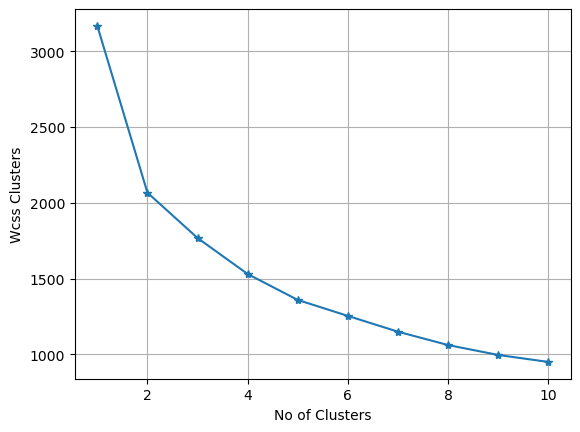

In [58]:
plt.plot(range(1,11), wcss, marker='*')
plt.xlabel('No of Clusters')
plt.ylabel('Wcss Clusters')
plt.grid()
plt.show()

6 is the Optimun cluster

In [59]:
km = KMeans(n_clusters=6, n_init=10, init='k-means++')

In [60]:
km.fit(pc1_array)

KMeans(n_clusters=6, n_init=10)

In [61]:
pd.Series(km.labels_).value_counts()

0    121
3    105
1     85
2     51
4     48
5     30
Name: count, dtype: int64

In [62]:
sil_score = silhouette_score(pc1_array, km.labels_)
sil_score

0.2363689979902919

In [63]:
pc1_array['pca_cluster_label'] = km.labels_

In [64]:
pc1_array.head()

,pc1,pc2,pc3,pc4,pc5,pca_cluster_label
0,-1.929953,0.350728,-0.756790,0.114237,-1.372157,1
1,-1.960488,-0.510034,-0.568184,0.013459,0.142916,1
2,-2.016782,-1.269431,-0.584758,-0.932279,0.069867,1
3,1.085269,-1.200770,-0.588357,-0.183414,0.435348,3
4,-1.343130,-1.786487,-0.719679,-0.103467,-0.146103,1


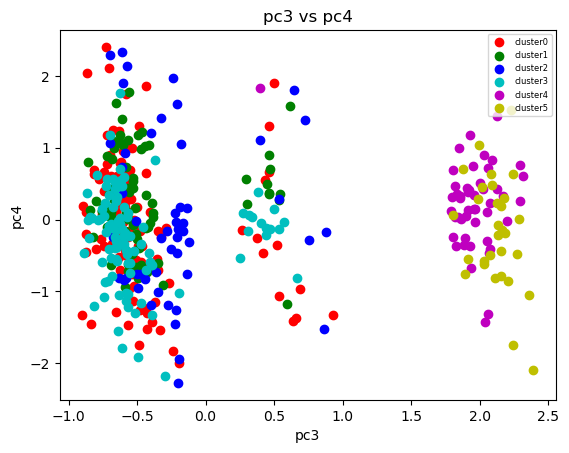

In [65]:
colors = ['r', 'g', 'b', 'c', 'm', 'y']

for i in range(max(km.labels_)+1):
    cluster_data = pc1_array[km.labels_==i]
    plt.scatter(cluster_data['pc3'],
                cluster_data['pc4'],
                c=colors[i],
                label=f'cluster{i}')
plt.xlabel('pc3')
plt.ylabel('pc4')
plt.title('pc3 vs pc4')
plt.legend(fontsize=6)